In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import set_config
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
import warnings

In [2]:
data_df = pd.read_csv('data.csv', sep=',')

In [3]:
data_df.head(4)

,SKU,Title,Price,Brand,Warranty,Color,SeriesLaptop,PartNum,CPUgen,CPU,...,Keyboard,OS,Size,Pin,Weight,LED,Accessories,Security,OptDrive,Feature
0,200900077,"Laptop ASUS D509DA EJ800T ( 15.6"" Full HD/AMD ...",10.190.000,ASUS,24,Bạc,NaN,EJ800T,"Ryzen 3 , AMD Ryzen thế hệ thứ 3",AMD Ryzen 3 3250U ( 2.6 GHz - 3.5 GHz / 4MB / ...,...,"thường , có phím số , không đèn",Windows 10 Home 64-bit,36 x 23.5 x 2.29 cm,2 cell Pin liền,1.9 kg,không đèn,NaN,NaN,NaN,NaN
1,201104484,"Laptop ASUS Vivobook Flip TM420IA EC155 ( 14"" ...",13.490.000,ASUS,24,Xám,VivoBook,EC155,"Ryzen 3 , AMD Ryzen thế hệ thứ 3",AMD Ryzen 3 4300U ( 2.7 GHz - 3.7 GHz / 4MB / ...,...,"thường , không phím số , LED",Windows 10 Home 64-bit,32.4 x 22 x 1.82 cm,"3 cell 42 Wh , Pin liền",1.5 kg,không đèn,NaN,NaN,NaN,Numberpad ảo tích hợp trên touchpad
2,200500682,"Laptop ASUS TUF Gaming FA506II AL012T ( 15.6"" ...",21.990.000,ASUS,24,Xám,TUF Gaming,AL012T,"Ryzen 5 , AMD Ryzen thế hệ thứ 4",AMD Ryzen 5 4600H ( 3.0 GHz - 4.0 GHz / 8MB / ...,...,"thường , có phím số , RGB",Windows 10 Home SL 64-bit,35.98 x 25.6 x 2.28 cm,"3 cell 48 Wh , Pin liền",2 kg,không đèn,NaN,NaN,NaN,NaN
3,201100788,"Laptop ASUS Vivobook X509JA EJ427T ( 15.6"" Ful...",11.190.000,ASUS,24,Bạc,VivoBook,EJ427T,"Core i3 , Intel Core thế hệ thứ 10",Intel Core i3-1005G1 ( 1.2 GHz - 3.4 GHz / 4MB...,...,"thường , có phím số , không đèn",Windows 10 Home SL 64-bit,36.02 x 23.49 x 2.29 cm,"2 cell 32 Wh , Pin liền",1.7 kg,không đèn,NaN,Vân tay,NaN,NaN


In [4]:
data_df.Price = pd.to_numeric(data_df.Price.str.replace('.', ''), errors='coerce')

## Tiền xử lý (tách các tập)

- Bây giờ ta sẽ thực hiện bước tiền xử lý là tách tập tập kiểm tra, validation và tập test ra theo tỉ lệ: 70%:15%:15%.


In [5]:
# Tách X và y
y_sr = data_df["Price"] # sr là viết tắt của series
X_df = data_df.drop("Price", axis=1)

In [6]:
# Tách tập huấn luyện, tập validation và tập test theo tỉ lệ 70%:15%:15%
# Tách dữ liệu thu thập thành 2 tập: tập huấn luyện và tập other (validation và test) theo tỉ lệ 70%:30%
train_X_df, other_X_df, train_y_sr, other_y_sr = train_test_split(X_df, y_sr, test_size=0.3, random_state=0)

# Tách tập other (validation và test) thành 2 tập: tập validation và tập test theo tỉ lệ 50%:50% 
val_X_df, test_X_df, val_y_sr, test_y_sr = train_test_split(other_X_df, other_y_sr, test_size=0.5, random_state=0)

In [7]:
train_X_df.shape, val_X_df.shape, test_X_df.shape, train_y_sr.shape, val_y_sr.shape, test_y_sr.shape

((555, 28), (119, 28), (120, 28), (555,), (119,), (120,))

## Khám phá dữ liệu (tập huấn luyện)

### Mỗi cột input hiện đang có kiểu dữ liệu gì?

In [8]:
train_X_df.dtypes

SKU               int64
Title            object
Brand            object
Warranty          int64
Color            object
SeriesLaptop     object
PartNum          object
CPUgen           object
CPU              object
GraphicChip      object
RAM              object
Screen           object
Storage          object
MaxStoPortNum    object
SupportM2        object
OutVideoPort     object
ConnectPort      object
Wireless         object
Keyboard         object
OS               object
Size             object
Pin              object
Weight           object
LED              object
Accessories      object
Security         object
OptDrive         object
Feature          object
dtype: object

Có vẻ nhiều cột đều có kiểu dữ liệu chưa phù hợp, ta sẽ xử lý xong. 

### Với mỗi cột input có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

In [9]:

num_cols = ['Warranty', 'SKU']

cat_cols = list(set(train_X_df.columns) - set(num_cols))
df = train_X_df[cat_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
df.agg([missing_ratio, num_values, value_ratios])

,ConnectPort,CPUgen,Wireless,Pin,Storage,Feature,Keyboard,OutVideoPort,GraphicChip,Color,...,Security,MaxStoPortNum,SupportM2,LED,Screen,Title,Brand,PartNum,OS,Accessories
missing_ratio,0.4,1.4,0.4,0,0,95,0,8.3,1.6,0.9,...,47.2,5,8.1,0.2,0,0,0,1.1,0.2,54.8
num_values,211,30,14,98,29,23,7,5,90,19,...,3,22,6,3,93,554,8,546,12,72
value_ratios,"{'1 x USB Type C , 2 x USB 3.1 , 1 x USB 2.0 ,...","{'Core i5 , Intel Core thế hệ thứ 8': 19.6, 'C...","{'WiFi 802.11ac , Bluetooth 5.0': 32.5, 'WiFi ...","{'3 cell 42 Wh , Pin liền': 15.0, '3 cell 45...","{'512GB SSD M.2 NVMe /': 33.0, '1TB HDD 5400RP...","{'Bàn phím số tích hợp trên touchpad': 14.3, '...","{'thường , không phím số , LED': 31.5, 'thư...","{'1 x HDMI': 88.6, '1 x HDMI , 1 x VGA/D-sub':...","{'Intel UHD Graphics': 20.1, 'Intel UHD Graphi...","{'Bạc': 31.1, 'Đen': 30.5, 'Xám': 18.2, 'Vàng...",...,"{'Vân tay': 93.2, 'Khuôn mặt': 5.8, 'Vân tay, ...","{'1 x 2.5"" SATA , 1 x M.2 NVMe': 25.2, '1 x M....","{'M.2 NVMe': 55.1, 'M.2 SATA/NVMe': 31.4, 'M.2...","{'không đèn': 92.6, 'LED': 5.2, 'RGB': 2.2}","{'14"" ( 1920 x 1080 ) Full HD IPS không cảm...",{'Laptop MSI Thin GF63 9SCSR-846VN màu Đen': 0...,"{'ASUS': 26.3, 'HP': 20.0, 'ACER': 16.6, 'Dell...","{'242VN': 0.5, '3493-N4I5122W': 0.4, 'N4I5107W...","{'Windows 10 Home SL 64-bit': 44.6, 'Windows 1...","{'Adapter, dây nguồn': 41.4, 'Cáp + Sạc': 8.0,..."


## Tiền xử lý (tập huấn luyện) (3.5đ)

Ta tiến hành tiền xử lý như sau:
   *  Với cột "CPUgen", ta sẽ tiến hành rút trích ra cột "CPUs" tương ứng. Tuy nhiên, cột "CPUs" có khá nhiều giá trị khác nhau nên chỉ lấy `num_top_cpus` (ví dụ, 6) giá trị xuất hiện nhiều nhất. Tương tự đối với cột "chipCPU" được rút chích từ cột "CPU".
   * Loại bỏ nhiều cột có nhiều giá trị khác nhau hoặc ít ảnh hưởng đến giá thành và các cột thiếu nhiều giá trị.
   * Rút trích các dữ liệu chính từ các cột và thay thế chúng. Như:
       - Cột "CPUgen" chỉ lấy tên CPU.
       - Cột "GraphicChip" chỉ lấy hảng sản xuất.
       - Cột "RAM" chỉ lấy số lượng RAM.
       - Cột "Screen" chỉ lấy kích thước inch.
       - Cột "Pin" chỉ lấy số cell.
       - Cột "Security" xét Yes nếu có bảo mật và ngược lại là No.
       - Cột "ChipCPU" chỉ lấy tên của chip CPU.
       - Cột "gen" lấy đời thứ mấy của CPU.
       - Cột "SSD" lấy kích thước của bộ nhớ.
   * Chuyển các cột dạng số về số.

In [10]:
def convert_col_dtype(col):
    if col.name == 'SSD':
        col.replace('1','1000', inplace = True)
        col.replace('2','2000', inplace = True)
        return pd.to_numeric(col, errors='coerce')
    if col.name == 'gen':
        col.replace('1000',np.NaN,inplace = True)
        return pd.to_numeric(col, errors='coerce')
    if col.name == 'Security':     
        return col.apply(lambda x: 'Yes' if not pd.isnull(x) else 'No')
    if col.name in ['Pin','Weight','Screen','RAM']:  
        return pd.to_numeric(col, errors='coerce')  
    return col

In [11]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_cpus= 6, num_top_chipCPU= 3):
        self.num_top_cpus = num_top_cpus
        self.num_top_chipCPU = num_top_chipCPU

    def fit(self, X_df, y=None):
        _CPUs = X_df['CPUgen'].str.extract(r'([A-z0-9\s]+)\,').iloc[:,0]
        _gen = X_df['CPU'].str.extract(r'([A-z0-9]+)\s\(').iloc[:,0]
        _chipCPU = _gen.str.extract(r'([A-z])').iloc[:,0]
        
        self.cpus_counts_ = _CPUs.value_counts()
        cpus_ = list(self.cpus_counts_.index)
        self.top_cpus_ = cpus_[:max(1, min(self.num_top_cpus, len(cpus_)))]
        
        self.chipCPU_counts_ = _chipCPU.value_counts()
        chipCPU_ = list(self.chipCPU_counts_.index)
        self.top_chipCPU_ = chipCPU_[:max(1, min(self.num_top_chipCPU, len(chipCPU_)))]        
        
        return self
    def transform(self, X_df, y=None):
        _df = X_df.copy()
        
        _df['CPUs'] = _df['CPUgen'].str.extract(r'([A-z0-9\s]+)\,')
        _df['chipCPU'] = _df['CPU'].str.extract(r'([A-z0-9]+)\s\(')
        _df['chipCPU'] = _df['chipCPU'].str.extract(r'([A-z])')
        
        _df['CPUs'] =_df['CPUs'].apply(lambda x: x if x in col_adderdropper.top_cpus_ else 'Others')
        _df['chipCPU'] =_df['chipCPU'].apply(lambda x: x if x in col_adderdropper.top_chipCPU_ else 'Others')
        
        _df['gen'] = _df['CPUgen'].str.extract(r'([0-9]+)$')
        _df['GraphicChip'] = _df['GraphicChip'].str.extract(r'([A-z]+)\s')
        _df['RAM'] = _df['RAM'].str.extract(r'([0-9]+)GB')
        _df['Screen'] = _df['Screen'].str.extract(r'([0-9.]+)')
        _df['SSD'] = _df['Storage'].str.extract(r'([0-9]+)[A-z]')
        _df['Pin'] = _df['Pin'].str.extract(r'([0-9A-z]+)\scell')
        _df['Weight'] = _df['Weight'].str.extract(r'([0-9.]+)')
        
        unused_cols = ['SKU', 'Title', 'Warranty','Color','PartNum','MaxStoPortNum',
               'SupportM2','OutVideoPort','ConnectPort','Wireless','Keyboard',
               'Size','LED','Accessories','OptDrive','Feature','OS',
               'Storage', 'CPUgen','CPU','SeriesLaptop']

        _df = _df.apply(convert_col_dtype)
        _df = _df.drop(unused_cols,axis=1)
        return _df

In [12]:
# TEST FIT METHOD
col_adderdropper = ColAdderDropper(num_top_cpus= 6, num_top_chipCPU= 3)
col_adderdropper.fit(train_X_df)
print(col_adderdropper.cpus_counts_)
print()
print(col_adderdropper.top_cpus_)
print()
print(col_adderdropper.chipCPU_counts_)
print()
print(col_adderdropper.top_chipCPU_)

Core i5     261
Core i3     112
Core i7      97
Ryzen 5      21
Ryzen 3      17
Ryzen 7      11
Pentium       7
Celeron       6
Core i9       2
Name: 0, dtype: int64

['Core i5 ', 'Core i3 ', 'Core i7 ', 'Ryzen 5 ', 'Ryzen 3 ', 'Ryzen 7 ']

U    286
G    117
H    111
N     13
i     11
Y      1
Name: 0, dtype: int64

['U', 'G', 'H']


## Sau khi tiền xử lý (tập huấn luyện) (3.5đ)

In [13]:
fewer_cols_train_X_df = col_adderdropper.transform(train_X_df)

In [14]:
fewer_cols_train_X_df.head()

,Brand,GraphicChip,RAM,Screen,Pin,Weight,Security,CPUs,chipCPU,gen,SSD
101,ASUS,Intel,8,13.3,3.0,1.3,Yes,Core i5,U,10.0,512
334,ACER,AMD,8,15.6,2.0,1.7,No,Ryzen 3,U,3.0,256
417,Dell,Intel,4,14.0,4.0,2.0,No,Core i3,U,8.0,1000
92,ASUS,NVIDIA,8,15.6,3.0,2.2,No,Core i5,H,8.0,1000
583,HP,NVIDIA,8,15.6,3.0,2.2,No,Core i7,H,9.0,512


In [15]:
fewer_cols_train_X_df.dtypes

Brand           object
GraphicChip     object
RAM              int64
Screen         float64
Pin            float64
Weight         float64
Security        object
CPUs            object
chipCPU         object
gen            float64
SSD              int64
dtype: object

Có vẽ như kiểu dữ liệu các cột đã phù hợp.

### Với mỗi cột input có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

In [16]:
num_cols = ['RAM', 'Screen', 'Pin', 'Weight','gen','SSD']
df = fewer_cols_train_X_df[num_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25).round(1)
def median(df):
    return df.quantile(0.5).round(1)
def upper_quartile(df):
    return df.quantile(0.75).round(1)
df.agg([missing_ratio, 'min', lower_quartile, median, upper_quartile, 'max'])

,RAM,Screen,Pin,Weight,gen,SSD
missing_ratio,0.0,0.0,8.1,0.0,4.3,0.0
min,4.0,11.6,2.0,0.9,2.0,16.0
lower_quartile,4.0,14.0,3.0,1.4,8.0,256.0
median,8.0,15.6,3.0,1.7,8.0,512.0
upper_quartile,8.0,15.6,3.0,2.0,10.0,1000.0
max,16.0,17.3,8.0,2.9,11.0,2000.0


### Với mỗi cột input có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

In [17]:
cat_cols = list(set(fewer_cols_train_X_df.columns) - set(num_cols))
df = fewer_cols_train_X_df[cat_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
df.agg([missing_ratio, num_values, value_ratios])

,Security,GraphicChip,CPUs,chipCPU,Brand
missing_ratio,0,1.6,0,0,0
num_values,2,4,7,4,8
value_ratios,"{'Yes': 52.8, 'No': 47.2}","{'Intel': 56.2, 'NVIDIA': 31.9, 'AMD': 8.6, 'S...","{'Core i5 ': 47.0, 'Core i3 ': 20.2, 'Core i7 ...","{'U': 51.5, 'G': 21.1, 'H': 20.0, 'Others': 7.4}","{'ASUS': 26.3, 'HP': 20.0, 'ACER': 16.6, 'Dell..."


### Các bước tiền xử lý tiếp theo như sau:

 - Với các cột dạng số, ta sẽ điền giá trị thiếu bằng giá trị mean của cột.
 - Với các cột không phải dạng số ta sẽ điền giá trị thiếu bằng giá trị mode (giá trị xuất hiện nhiều nhất) của cột. Sau đó, ta sẽ chuyển sang dạng số bằng phương pháp mã hóa one-hot.
 - Cuối cùng, khi tất cả các cột đã được điền giá trị thiếu và đã có dạng số, ta sẽ tiến hành chuẩn hóa.

In [18]:
nume_cols = ['RAM','gen','SSD','Screen','Weight','Pin']
unorder_cate_cols = ['GraphicChip', 'Brand','Security','CPUs','chipCPU']

# YOUR CODE HERE
mean_numcols = SimpleImputer(missing_values = np.nan, strategy = 'mean')
mode_ordercols = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
mode_unordercols = make_pipeline(mode_ordercols, OneHotEncoder(handle_unknown='ignore'))

col_transform = ColumnTransformer([('nume_cols', mean_numcols, nume_cols),\
                                ('unorder_cate_cols', mode_unordercols,unorder_cate_cols)])

preprocess_pipeline = make_pipeline(col_adderdropper,col_transform,StandardScaler())
preprocessed_train_X = preprocess_pipeline.fit_transform(train_X_df)

In [19]:
preprocessed_train_X.shape

(555, 31)

## Tiền xử lý + mô hình hóa

### Do bài toán hồi quy cho nên dùng các mô hình hồi quy.
### Tìm mô hình tốt nhất

In [20]:
# Tính độ đo r^2 trên tập huấn luyện
def compute_mse(y, preds):
    return ((y - preds) ** 2).mean()
def compute_rr(y, preds, baseline_preds):
    return 1 - compute_mse(y, preds) / compute_mse(y, baseline_preds)
baseline_preds = train_y_sr.mean()

### 1. Mô hình SGDRegressor

 * Tham số: penalty='l1', random_state=0,shuffle = False, early_stopping=True
 * Siêu tham số alpha với 5 giá trị khác nhau.
 * Tham số num_top_cpus với 6 giá trị khác nhau.

In [21]:
SGD_Regressort_model =  SGDRegressor(penalty='l1', random_state=0,shuffle = False, early_stopping=True)
full_pipeline1 = make_pipeline(col_adderdropper, col_transform, StandardScaler(), SGD_Regressort_model)

# Thử nghiệm với các giá trị khác nhau của các siêu tham số
# và chọn ra các giá trị tốt nhất
train_errs1 = []
val_errs1 = []
alphas = [0.01, 0.1, 1, 10, 100]
num_top_cpus_s = [1,3,5,6,8,9]
best_val_err1 = float('inf'); best_alpha1 = None; best_num_top_cpus1 = None
for alpha in alphas:
    for num_top_cpus in num_top_cpus_s:
        full_pipeline1.set_params(coladderdropper__num_top_cpus = num_top_cpus,coladderdropper__num_top_chipCPU = 3, sgdregressor__alpha=alpha)
        full_pipeline1.fit(train_X_df, train_y_sr)

        train_errs1.append(100 - compute_rr(train_y_sr, full_pipeline1.predict(train_X_df), baseline_preds) * 100)
        val_errs1.append(100 - compute_rr(val_y_sr, full_pipeline1.predict(val_X_df), baseline_preds) * 100)

        
        
        if val_errs1[-1] < best_val_err1:
            best_val_err1 = val_errs1[-1]
            best_alpha1 = alpha
            best_num_top_cpus1 = num_top_cpus

'Finish!'

'Finish!'

In [22]:
full_pipeline1

Pipeline(steps=[('coladderdropper', ColAdderDropper(num_top_cpus=9)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('nume_cols', SimpleImputer(),
                                                  ['RAM', 'gen', 'SSD',
                                                   'Screen', 'Weight', 'Pin']),
                                                 ('unorder_cate_cols',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GraphicChip', 'Brand',
                                                   'Security', 'CPUs',
                                                   'chip

In [23]:
print(best_val_err1)
print(best_num_top_cpus1)
print(best_alpha1)

14.814083972112954
9
100


### 2. Mô hìnhTweedieRegressor

 * Tham số: link = 'log'
 * Siêu tham số alpha với 5 giá trị khác nhau.
 * Tham số num_top_cpus với 6 giá trị khác nhau.

In [24]:
Tweedie_Regressor_model =  linear_model.TweedieRegressor(link = 'log')
full_pipeline2 = make_pipeline(col_adderdropper, col_transform, StandardScaler(), Tweedie_Regressor_model)

# Thử nghiệm với các giá trị khác nhau của các siêu tham số
# và chọn ra các giá trị tốt nhất
train_errs2 = []
val_errs2 = []
alphas = [0.01, 0.1, 1, 10, 100]
num_top_cpus_s = [1,3,5,6,8,9]
best_val_err2 = float('inf'); best_alpha2 = None; best_num_top_cpus2 = None
for alpha in alphas:
    for num_top_cpus in num_top_cpus_s:
        full_pipeline2.set_params(coladderdropper__num_top_cpus = num_top_cpus,coladderdropper__num_top_chipCPU = 5, tweedieregressor__alpha=alpha)
        full_pipeline2.fit(train_X_df, train_y_sr)

        train_errs2.append(100 - compute_rr(train_y_sr, full_pipeline2.predict(train_X_df), baseline_preds) * 100)
        val_errs2.append(100 - compute_rr(val_y_sr, full_pipeline2.predict(val_X_df), baseline_preds) * 100)

        if val_errs2[-1] < best_val_err2:
            best_val_err2 = val_errs2[-1]
            best_alpha2 = alpha
            best_num_top_cpus2 = num_top_cpus

'Finish!'

'Finish!'

In [25]:
full_pipeline2

Pipeline(steps=[('coladderdropper',
                 ColAdderDropper(num_top_chipCPU=5, num_top_cpus=9)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('nume_cols', SimpleImputer(),
                                                  ['RAM', 'gen', 'SSD',
                                                   'Screen', 'Weight', 'Pin']),
                                                 ('unorder_cate_cols',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GraphicChip', 'Brand',
                                                   'Security', 'CPUs',
                    

In [26]:
print(best_val_err2)
print(best_num_top_cpus2)
print(best_alpha2)

13.540775616999099
8
0.1


### 3. Mô hình RandomforestRegressor

 * Tham số num_top_cpus với 6 giá trị khác nhau.

In [27]:
RandomForest_Regressorneural_model = RandomForestRegressor()
full_pipeline3 = make_pipeline(col_adderdropper, col_transform, StandardScaler(), RandomForest_Regressorneural_model)

train_errs3 = []
val_errs3 = []
num_top_cpus_s = [1,3,5,6,8,9]
best_val_err3 = float('inf');  best_num_top_cpus3 = None

for num_top_cpus in num_top_cpus_s:
    full_pipeline3.set_params(coladderdropper__num_top_cpus = num_top_cpus,coladderdropper__num_top_chipCPU = 3)
    full_pipeline3.fit(train_X_df, train_y_sr)

    train_errs3.append(100 - compute_rr(train_y_sr, full_pipeline3.predict(train_X_df), baseline_preds) * 100)
    val_errs3.append(100 - compute_rr(val_y_sr, full_pipeline3.predict(val_X_df), baseline_preds) * 100)

    if val_errs3[-1] < best_val_err3:
        best_val_err3 = val_errs3[-1]

        best_num_top_cpus3 = num_top_cpus

'Finish!'

'Finish!'

In [28]:
full_pipeline3

Pipeline(steps=[('coladderdropper', ColAdderDropper(num_top_cpus=9)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('nume_cols', SimpleImputer(),
                                                  ['RAM', 'gen', 'SSD',
                                                   'Screen', 'Weight', 'Pin']),
                                                 ('unorder_cate_cols',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GraphicChip', 'Brand',
                                                   'Security', 'CPUs',
                                                   'chip

In [29]:
print(best_val_err3)
print(best_num_top_cpus3)

12.658100450644056
9


### 4. Mô hình Neural Network

 * Tham số: hidden_layer_sizes=(20), activation='tanh', solver='lbfgs', random_state=0, max_iter=2500
 * Siêu tham số alpha với 5 giá trị khác nhau.
 * Tham số num_top_cpus với 6 giá trị khác nhau.

In [30]:
import warnings

In [31]:
warnings.filterwarnings('ignore')
neural_net_mode = MLPRegressor(hidden_layer_sizes=(20), activation='tanh', solver='lbfgs', random_state=0, max_iter=2500)
full_pipeline4 = make_pipeline(col_adderdropper, col_transform, StandardScaler(), neural_net_mode)

# Thử nghiệm với các giá trị khác nhau của các siêu tham số
# và chọn ra các giá trị tốt nhất
train_errs4 = []
val_errs4 = []
alphas = [0.01, 0.1, 1, 10, 100]
num_top_cpus_s = [1,3,5,6,8,9]
best_val_err4 = float('inf'); best_alpha4 = None; best_num_top_cpus4= None
for alpha in alphas:
    for num_top_cpus in num_top_cpus_s:
        full_pipeline4.set_params(coladderdropper__num_top_cpus = num_top_cpus,coladderdropper__num_top_chipCPU = 3, mlpregressor__alpha=alpha)
        full_pipeline4.fit(train_X_df, train_y_sr)

        train_errs4.append(100 - compute_rr(train_y_sr, full_pipeline4.predict(train_X_df), baseline_preds) * 100)
        val_errs4.append(100 - compute_rr(val_y_sr, full_pipeline4.predict(val_X_df), baseline_preds) * 100)

        if val_errs4[-1] < best_val_err4:
            best_val_err4 = val_errs4[-1]
            best_alpha4 = alpha
            best_num_top_cpus4 = num_top_cpus

'Finish!'

'Finish!'

In [32]:


full_pipeline4

Pipeline(steps=[('coladderdropper', ColAdderDropper(num_top_cpus=9)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('nume_cols', SimpleImputer(),
                                                  ['RAM', 'gen', 'SSD',
                                                   'Screen', 'Weight', 'Pin']),
                                                 ('unorder_cate_cols',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GraphicChip', 'Brand',
                                                   'Security', 'CPUs',
                                                   'chip

In [33]:
print(best_val_err4)
print(best_num_top_cpus4)
print(best_alpha4)

52.186481285352556
1
1



### Đánh giá kết quả trên tập validation của mô hình thu được

  - Cái nào tốt nhất

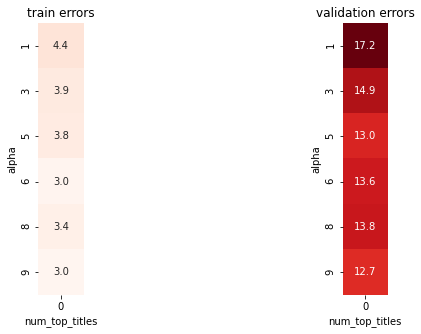

In [34]:
#Trực quan hoá dữ liệu
train_errs_df = pd.DataFrame(data=np.array(train_errs3).reshape(len(num_top_cpus_s), -1),
                             index=num_top_cpus_s)
val_errs_df = pd.DataFrame(data=np.array(val_errs3).reshape(len(num_top_cpus_s), -1), 
                           index=num_top_cpus_s)
min_err = min(min(train_errs3), min(val_errs3))
max_err = max(max(train_errs3), max(val_errs3))
plt.figure(figsize=(10, 5))



plt.subplot(1, 2, 1)
sns.heatmap(train_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('train errors'); plt.xlabel('num_top_titles'); plt.ylabel('alpha')
plt.subplot(1, 2, 2)
sns.heatmap(val_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('validation errors'); plt.xlabel('num_top_titles'); plt.ylabel('alpha');

In [37]:

full_pipeline2.set_params(coladderdropper__num_top_cpus = best_num_top_cpus2,coladderdropper__num_top_chipCPU = 5)

Pipeline(steps=[('coladderdropper',
                 ColAdderDropper(num_top_chipCPU=5, num_top_cpus=8)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('nume_cols', SimpleImputer(),
                                                  ['RAM', 'gen', 'SSD',
                                                   'Screen', 'Weight', 'Pin']),
                                                 ('unorder_cate_cols',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GraphicChip', 'Brand',
                                                   'Security', 'CPUs',
                    